# Importing Libraries

In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading dataset 

In [37]:
pred_data = pd.read_csv('C:/Users/victoria/Desktop/ML/project - milling prediction/ai4i2020.csv')

# Preprocessing data

In [38]:
# checking the first five (5) rows of the dataset
pred_data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [39]:
# dropping product ID
pred_data.drop(['Product ID', 'UDI'], axis=1, inplace = True)

In [14]:
# checking the size of the data
pred_data.shape

(10000, 12)

In [15]:
# data description

pred_data_numeric = pred_data.select_dtypes(include=[np.number])
pred_data_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


In [18]:
#checking the main variables in the dataset
pred_data.keys()

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

## - checking for missing values

In [19]:
# checking for missing or null values
pred_data.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

N.B  there are no missing values

In [20]:
# checking for distribution of data
counts = (pred_data.Type.value_counts())
print(counts)

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


In [21]:
# Identifying rows where 'machine failure' is 1 but all failure modes are 0
condition_1 = (
    (pred_data['Machine failure'] == 1) & 
    (pred_data['TWF'] == 0) & 
    (pred_data['HDF'] == 0) & 
    (pred_data['PWF'] == 0) & 
    (pred_data['OSF'] == 0) & 
    (pred_data['RNF'] == 0)
)

# Identifying rows where 'machine failure' is 0 but at least one failure mode is 1
condition_2 = (
    (pred_data['Machine failure'] == 0) & 
    ((pred_data['TWF'] == 1) | 
     (pred_data['HDF'] == 1) | 
     (pred_data['PWF'] == 1) | 
     (pred_data['OSF'] == 1) | 
     (pred_data['RNF'] == 1))
)

# Before updating the 'Machine failure' status, we should review these cases.
print(f"Found {len(pred_data[condition_1])} instances of 'Machine failure' with no individual modes triggered.")
print(f"Found {len(pred_data[condition_2])} instances of individual failure modes triggered without 'Machine failure'.")

# For rows where 'machine failure' is 1 but all failure modes are 0, set 'Machine failure' to 0
pred_data.loc[condition_1, 'Machine failure'] = 0

# For rows where 'machine failure' is 0 but at least one failure mode is 1, set 'Machine failure' to 1
pred_data.loc[condition_2, 'Machine failure'] = 1

Found 9 instances of 'Machine failure' with no individual modes triggered.
Found 18 instances of individual failure modes triggered without 'Machine failure'.


# Exploratory data analysis

## visualizing the different failure modes
This enables us to see which failure modes are more common

C:\Users\victoria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\victoria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\victoria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\victoria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

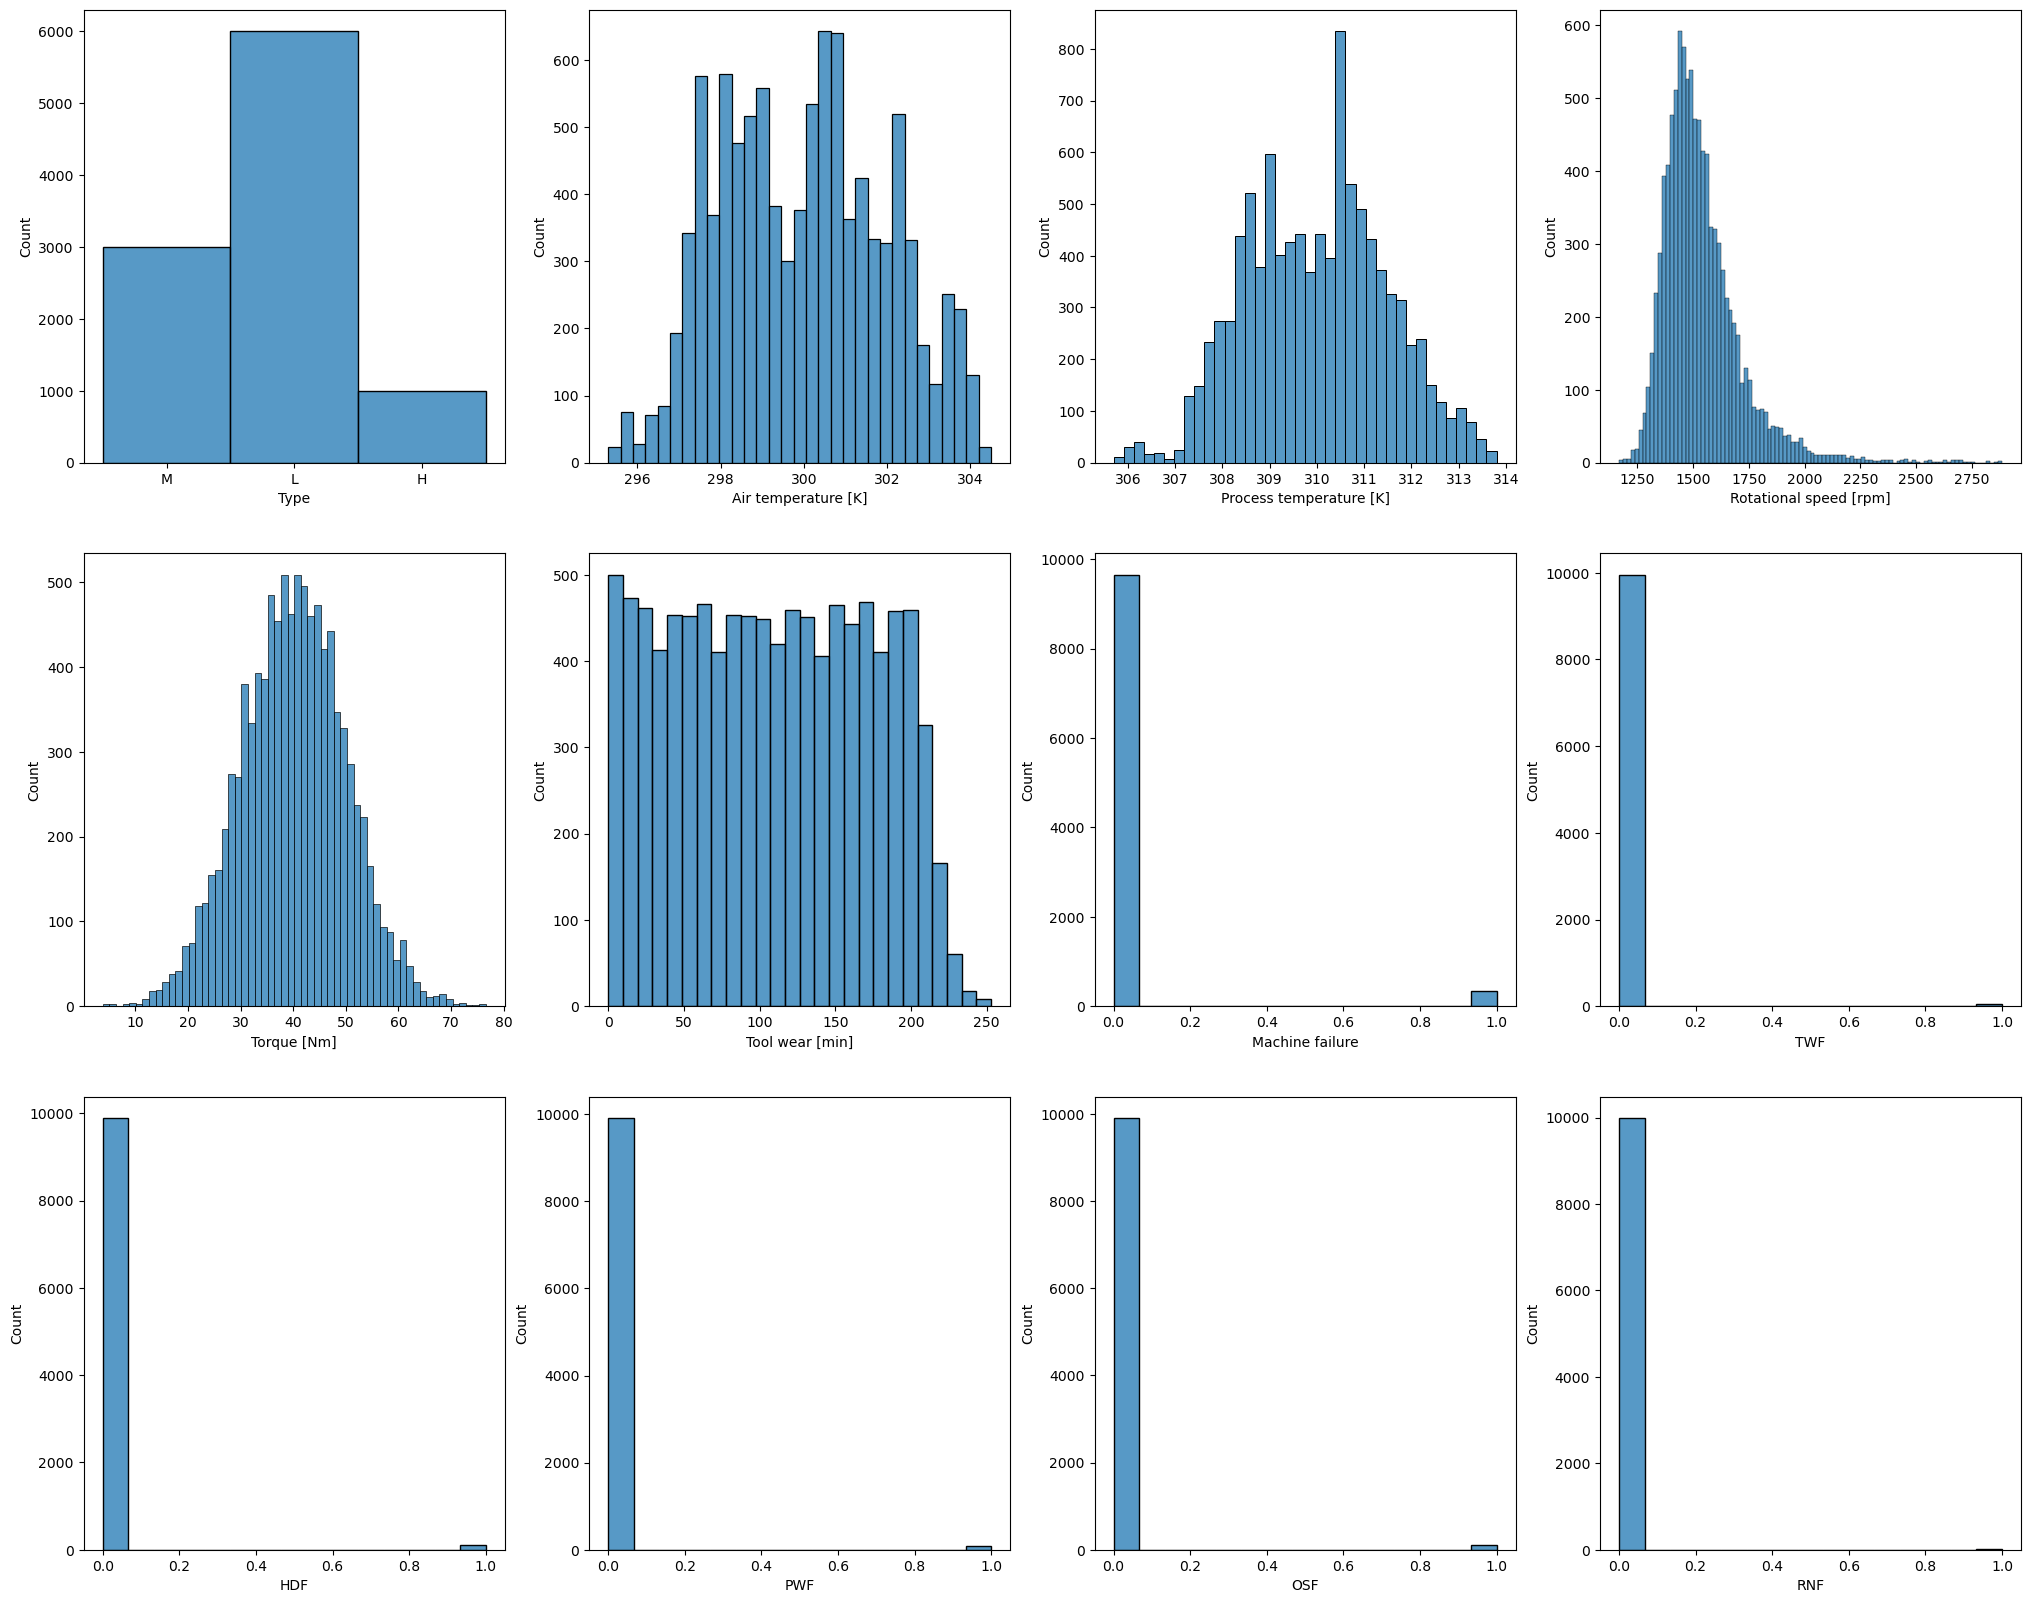

In [22]:
# plotting histogram

fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(pred_data.columns):
    sns.histplot(pred_data[col], ax=ax[i//4][i%4])

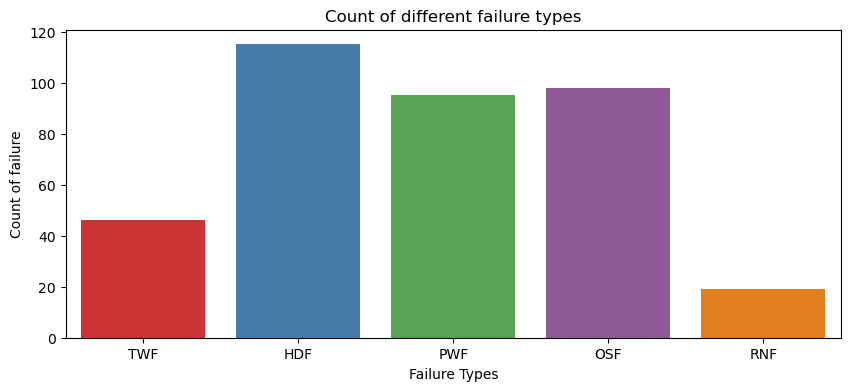

In [24]:
# visualizing the failure modes

barchart = pred_data[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
countf = barchart.sum()
plt.figure(figsize=(10, 4))
plt.title('Count of different failure types')
plt.xlabel('Failure Types')
plt.ylabel('Count of failure')

sns.barplot(x = countf.index, y=countf.values, palette="Set1")

plt.show()

N.B from the bar chart, (Heat Dissipation Failure)HDF is the most common failure mode

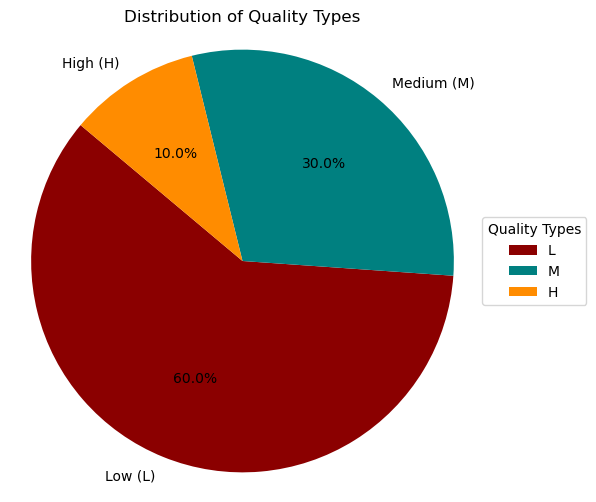

In [25]:
# visualizing Quality Types via pie chart

counts = (pred_data.Type.value_counts())
labels = counts.index

colors = ['darkred', 'teal', 'darkorange']

plt.figure(figsize=(6, 6)) 
plt.title('Distribution of Quality Types') 
plt.pie(counts, labels=['Low (L)', 'Medium (M)', 'High (H)'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.rcParams['patch.edgecolor']='white'
plt.legend(labels, title="Quality Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')

plt.show()

### Checking the percentage of machine failures to know if some machine qualities are more prone to failure than the rest

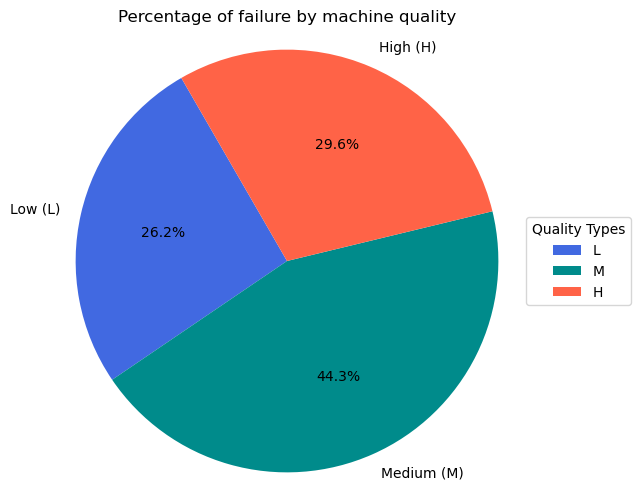

In [26]:
# visualizing Quality Types via pie chart


failure_counts = pred_data.groupby('Type')['Machine failure'].sum().reset_index()
failure_counts.columns = ['Machine Quality', 'Failure Count']

# Calculate the total counts for each machine quality
value_counts = pred_data['Type'].value_counts().reset_index()
value_counts.columns = ['Machine Quality', 'Total Count']

# Merge the two dataframes to get a complete picture of failures vs total counts
failure_counts = failure_counts.merge(value_counts, on='Machine Quality')
failure_counts['Failure Percentage'] = (failure_counts['Failure Count'] / failure_counts['Total Count']) * 100

colors = ['royalblue', 'darkcyan', 'tomato']

plt.figure(figsize=(6, 6)) 
plt.title('Percentage of failure by machine quality') 

plt.pie(failure_counts['Failure Percentage'], labels=['Low (L)', 'Medium (M)', 'High (H)'], 
        autopct='%1.1f%%', startangle=120, colors=colors)

plt.legend(labels, title="Quality Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')

plt.show()

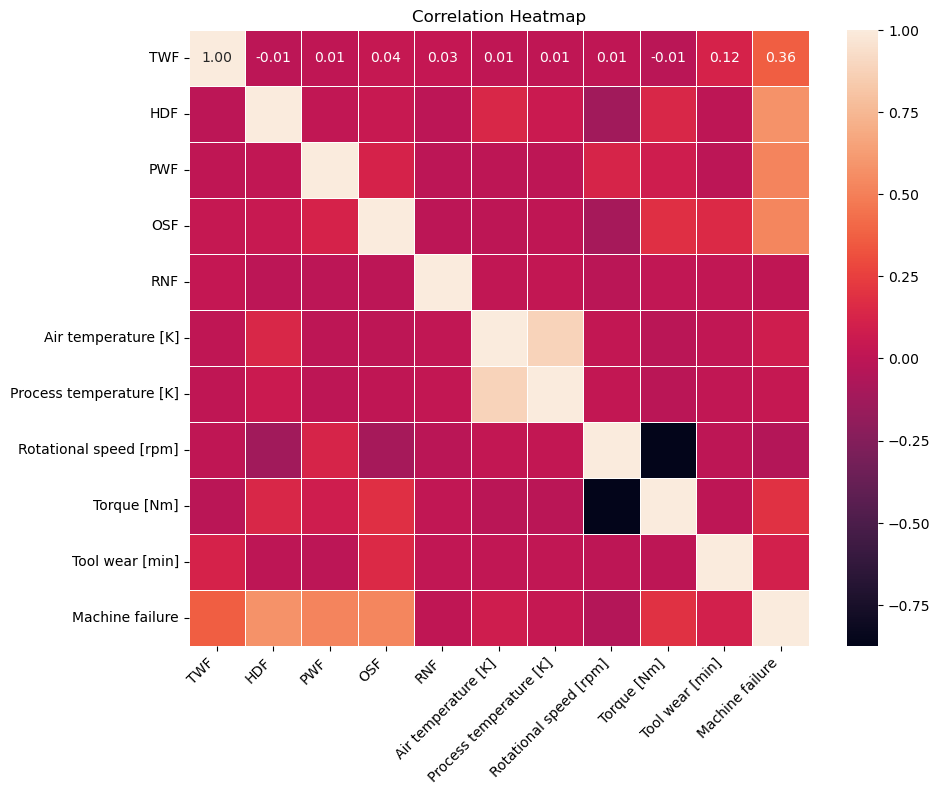

In [41]:
# determining the correlation between the other features and Machine failure via Heatmap
plt.figure(figsize=(10, 8))
heatmap_data = pred_data[['TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']]
correlation_matrix = heatmap_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.show()

## data type conversion - replacing strings with numerical values

In [42]:
# replacing values 'L', 'M', and 'H' with numerical values

pred_data.replace({'Type':{'L':0, 'M':1, 'H':2}}, inplace=True)
# rechecking for distribution of data
counts = (pred_data.Type.value_counts())
print(counts)

Type
0    6000
1    2997
2    1003
Name: count, dtype: int64


In [43]:
pred_data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# Preparing data for modeling - Feature selection

In [44]:
failure_modes = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

In [45]:
# adding new features to improve the accuracy of the dataset

pred_data['Power'] = pred_data['Rotational speed [rpm]'] * pred_data['Torque [Nm]'] 
pred_data['Temperature difference'] = pred_data['Process temperature [K]'] - pred_data['Air temperature [K]']
pred_data['Strain'] = pred_data['Torque [Nm]'] * pred_data['Tool wear [min]']

In [46]:
pred_data.head().transpose()

,0,1,2,3,4
Type,1.0,0.0,0.0,0.0,0.0
Air temperature [K],298.1,298.2,298.1,298.2,298.2
Process temperature [K],308.6,308.7,308.5,308.6,308.7
Rotational speed [rpm],1551.0,1408.0,1498.0,1433.0,1408.0
Torque [Nm],42.8,46.3,49.4,39.5,40.0
Tool wear [min],0.0,3.0,5.0,7.0,9.0
Machine failure,0.0,0.0,0.0,0.0,0.0
TWF,0.0,0.0,0.0,0.0,0.0
HDF,0.0,0.0,0.0,0.0,0.0
PWF,0.0,0.0,0.0,0.0,0.0


In [47]:
#saving the model
pred_data.to_csv("cleaned_dataset.csv", index=False)  

# Splitting data into testing and training

In [131]:
# serparating the data and labels

for failure_mode in failure_modes:
    x = pred_data.drop(failure_modes, axis=1)
    y = pred_data[failure_modes]

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [133]:
# visualizing the number of testing and training data we have
x.shape, x_train.shape, x_test.shape

((10000, 9), (7000, 9), (3000, 9))

In [134]:
#Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(x_train, y_train)
x_train_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_train_prediction, y_test)

# Model Evaluation

In [135]:
print('accuracy on test data: ', test_data_accuracy)

accuracy on test data:  0.985


In [136]:
# individual failure modes metrics

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

models = {}
results_original_features = []

y_pred = np.around(model.predict(x_test))
classification_rep = classification_report(y_test, y_pred)

# Store the trained model and its evaluation metrics in the 'models' dictionary
models[failure_mode] = {
        'model': model,
        'accuracy': test_data_accuracy,
        'classification_report': classification_rep,
    }
    
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred)
    
results_original_features.append({
        'Failure Mode': failure_mode,
        'Accuracy': test_data_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })


print(classification_rep)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.00      0.00      0.00        10
           2       0.82      0.95      0.88        42
           3       1.00      0.97      0.98        31
           4       1.00      0.96      0.98        26
           5       0.00      0.00      0.00         6

   micro avg       0.82      0.85      0.83       220
   macro avg       0.61      0.62      0.62       220
weighted avg       0.81      0.85      0.83       220
 samples avg       0.03      0.03      0.03       220



C:\Users\victoria\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\victoria\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score'])


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

model_performance.loc[model] = [accuracy, precision, recall, f1]


model_performance

,Accuracy,Precision,Recall,F1-Score
DecisionTreeClassifier(),0.985,0.813392,0.845455,0.828201


## Making a predictive system

In [138]:
import pickle
import numpy as np

#saving the model
pickle.dump(model, open('prediction_model.pkl', 'wb'))

In [141]:
#input_data = (0,298.9,309.1,2861,4.6,143,13160.599999999999,10.200000000000045,657.8)

load_model = pickle.load(open('C:/Users/victoria/Desktop/ML/project - milling prediction/prediction_model.pkl', 'rb'))

def milling_machine_prediction(Air_temperature, Process_temperature, Rotational_speed, Torque, Tool_Wear, Type):


    Power = Rotational_speed * Torque
    Temperature_difference = Process_temperature - Air_temperature
    Strain = Torque * Tool_Wear

    #changing the input to a numpy array
    pred_data_array = np.array([Air_temperature, Process_temperature, Rotational_speed, Torque, Tool_Wear, Type, Power, Temperature_difference, Strain])
    
    #reshaping array since we are predicting for one instance
    reshaped_data = pred_data_array.reshape(1, -1)

    prediction = load_model.predict(reshaped_data)
    print(prediction)
    
    
    failure_type =''
    if prediction[0,1]==1:
        failure_type='Tool Wear Failure (TWF)'
    
    elif prediction[0,2]==1:
        failure_type='Heat Dissipation Failure (HDF)'
    
    elif prediction[0,3]==1:
        failure_type='Power Failure (PWF)'
    
    elif prediction[0,4]==1:
        failure_type='Overstrain failure (OSF)'
    
    elif prediction[0,5]==1:
        failure_type='Random failures (RNF)'
    
    else:
        failure_type='NO FAILURE'



    if failure_type != 'NO FAILURE':
        out = f'There is a machine failure, \nmost likely  {failure_type}'
    else:
        out = 'There is no failure'
    print(out)
    return out



def mapping(level):
    out = 0
    level = level.upper()
    if level == 'LOW': 
        out = 0
    elif level == 'MEDIUM':
        out = 1 
    elif level == 'HIGH':
        out = 2
    return float(out)
    
    


def main():

    Air_temperature = float(input('Air temperature: '))
    Process_temperature = float(input('Process temperature: '))
    Rotational_speed = float(input('Rotational speed: '))
    Torque = float(input('Torque: '))
    Tool_Wear = float(input('Tool Wear: '))
    Type = mapping(input('Enter High, Medium or Low: '))

    output = ''
    output = milling_machine_prediction(Air_temperature, Process_temperature, Rotational_speed, Torque, Tool_Wear, Type)


main()


C:\Users\victoria\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Air temperature:  298.9
Process temperature:  309.0
Rotational speed:  1410
Torque:  65.7
Tool Wear:  191
Enter High, Medium or Low:  Low


[[1 1 0 1 1 0]]
There is a machine failure, 
most likely  Tool Wear Failure (TWF)


C:\Users\victoria\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
